In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("student_habits_performance.csv")

In [5]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
df.shape

(1000, 16)

In [7]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [10]:
# Create imputer for categorical data
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform
df[['parental_education_level']] = imputer.fit_transform(df[['parental_education_level']])

In [11]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [12]:
df.drop('student_id', axis=1, inplace=True)

## Study Hours vs Exam Score

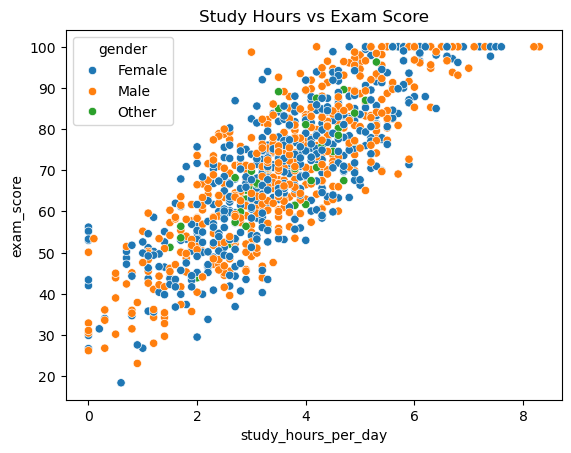

In [13]:
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender')
plt.title('Study Hours vs Exam Score')
plt.show()

## Mental Health vs Exam Score

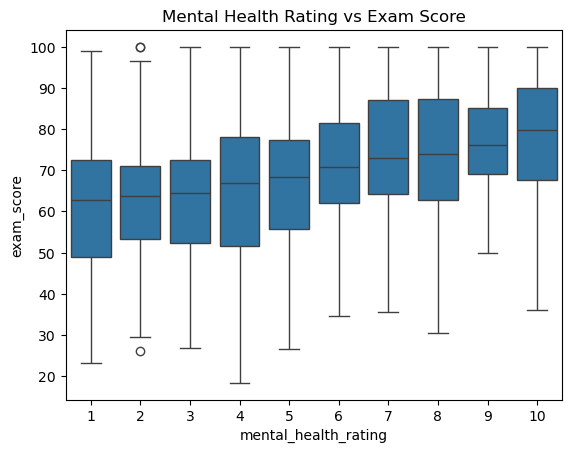

In [14]:
sns.boxplot(data=df, x='mental_health_rating', y='exam_score')
plt.title('Mental Health Rating vs Exam Score')
plt.show()

## Parental Education Level vs Exam Score

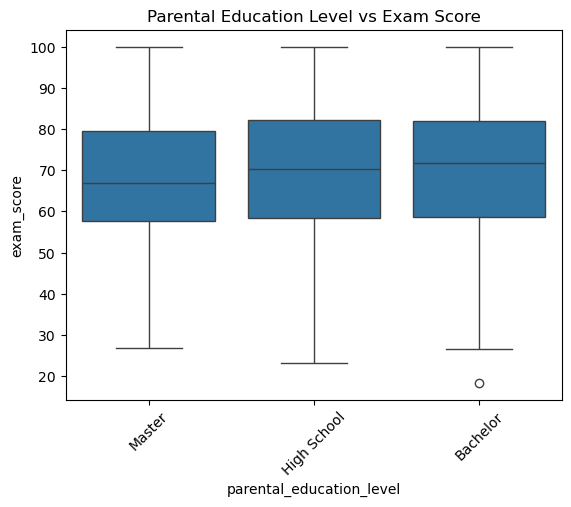

In [15]:
sns.boxplot(data=df, x='parental_education_level', y='exam_score')
plt.title('Parental Education Level vs Exam Score')
plt.xticks(rotation=45)
plt.show()

## Sleep Hours vs Exam Score

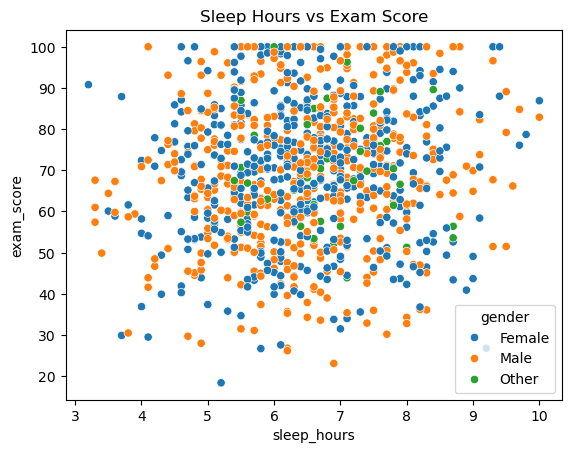

In [16]:
sns.scatterplot(data=df, x='sleep_hours', y='exam_score', hue='gender')
plt.title('Sleep Hours vs Exam Score')
plt.show()

## Diet Quality vs Exam Score

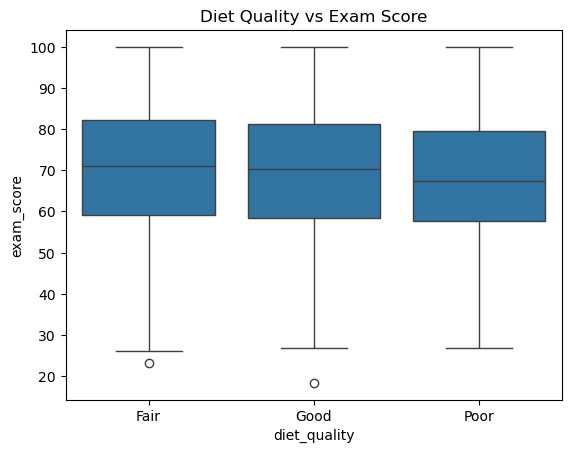

In [17]:
sns.boxplot(data=df, x='diet_quality', y='exam_score')
plt.title('Diet Quality vs Exam Score')
plt.show()

## Social Media Hours vs Exam Score

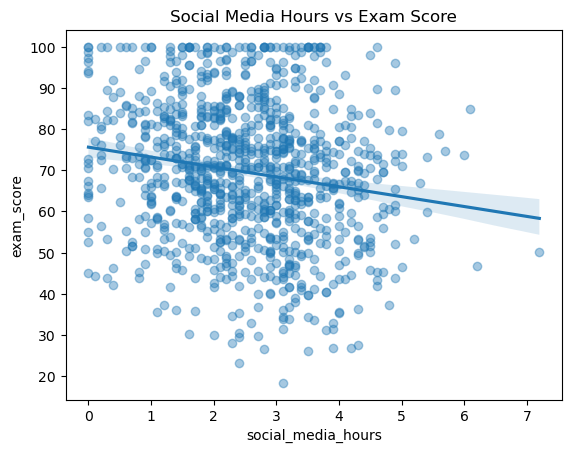

In [18]:
sns.regplot(data=df, x='social_media_hours', y='exam_score', scatter_kws={'alpha':0.4})
plt.title('Social Media Hours vs Exam Score')
plt.show()

 # Correlation Matrix (Heatmap)

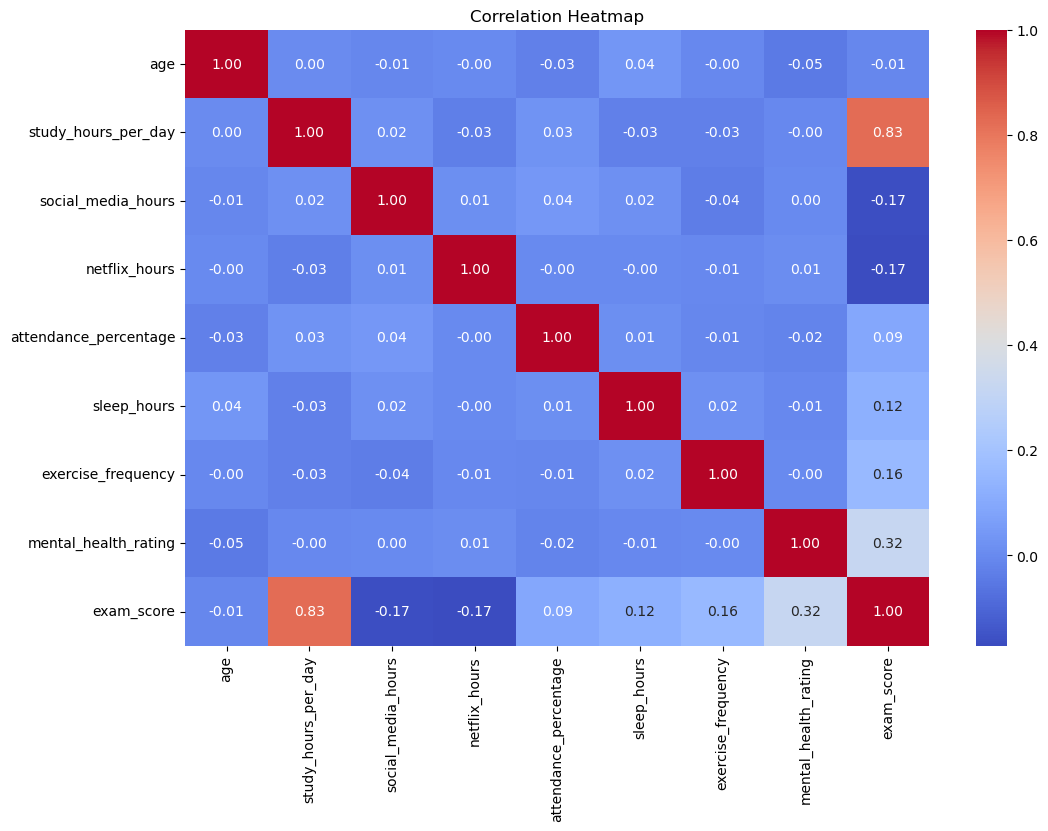

In [19]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# PairGrid with KDE & Scatter for Multivariate Analysis

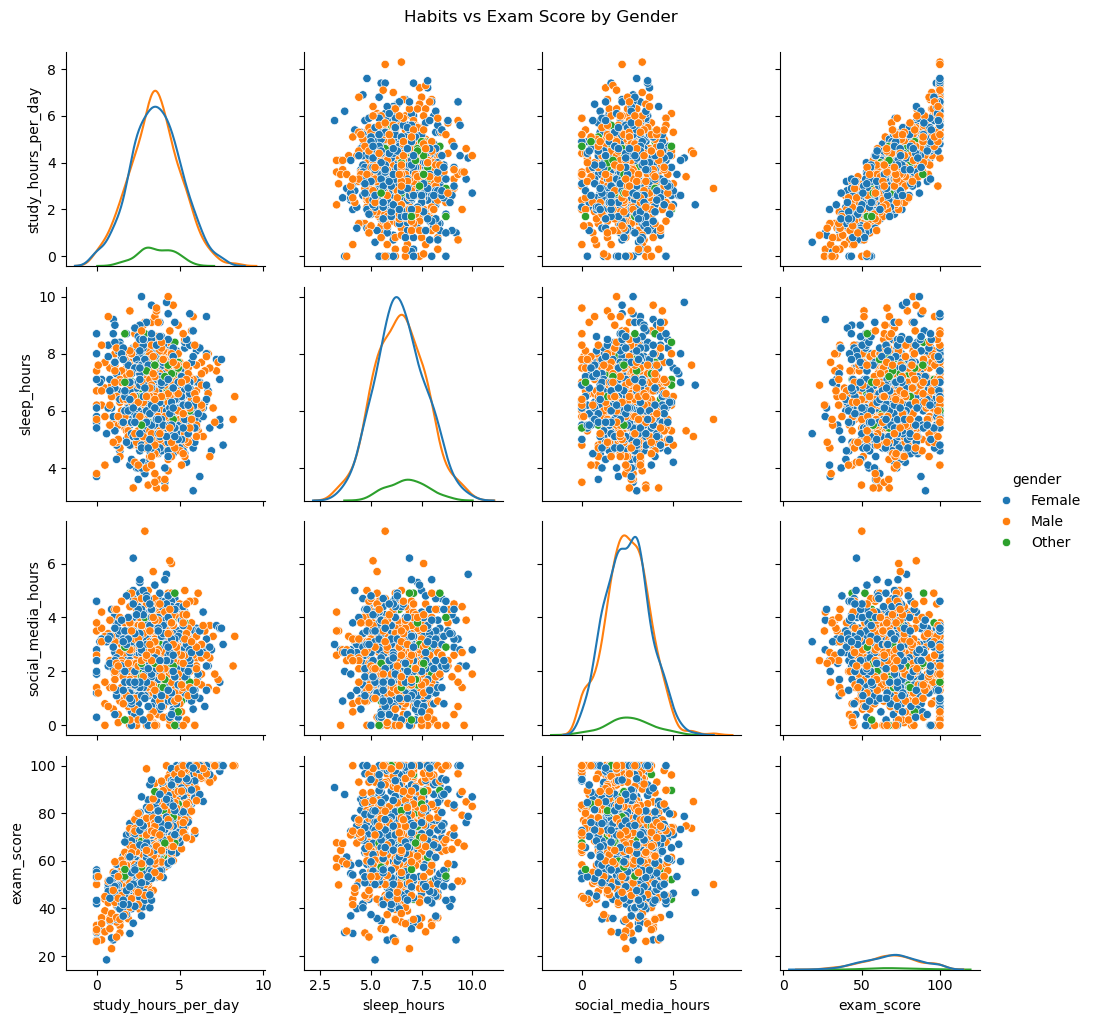

In [20]:
g = sns.PairGrid(df, vars=['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'exam_score'], hue='gender')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.suptitle("Habits vs Exam Score by Gender", y=1.02)
plt.show()

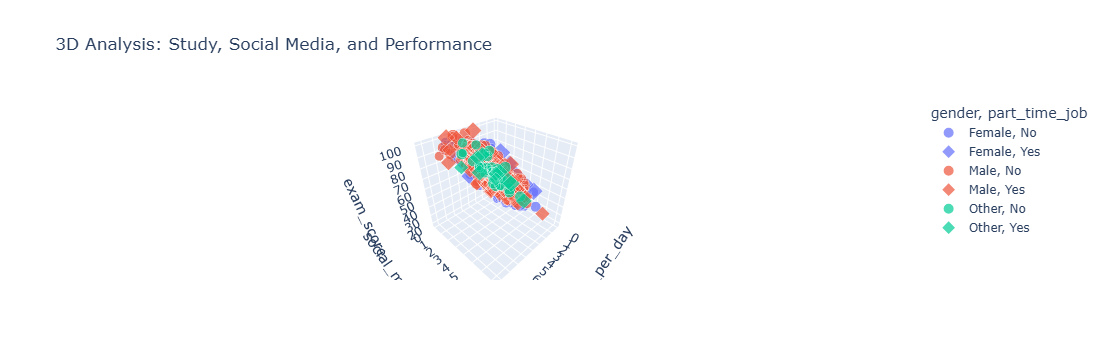

In [22]:
import plotly.express as px

fig = px.scatter_3d(df, x='study_hours_per_day', y='social_media_hours', z='exam_score',
                    color='gender', symbol='part_time_job', size='sleep_hours',
                    title='3D Analysis: Study, Social Media, and Performance')
fig.show()